In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Crop_recommendation.csv')
data.head(n=10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
data.shape

(2200, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


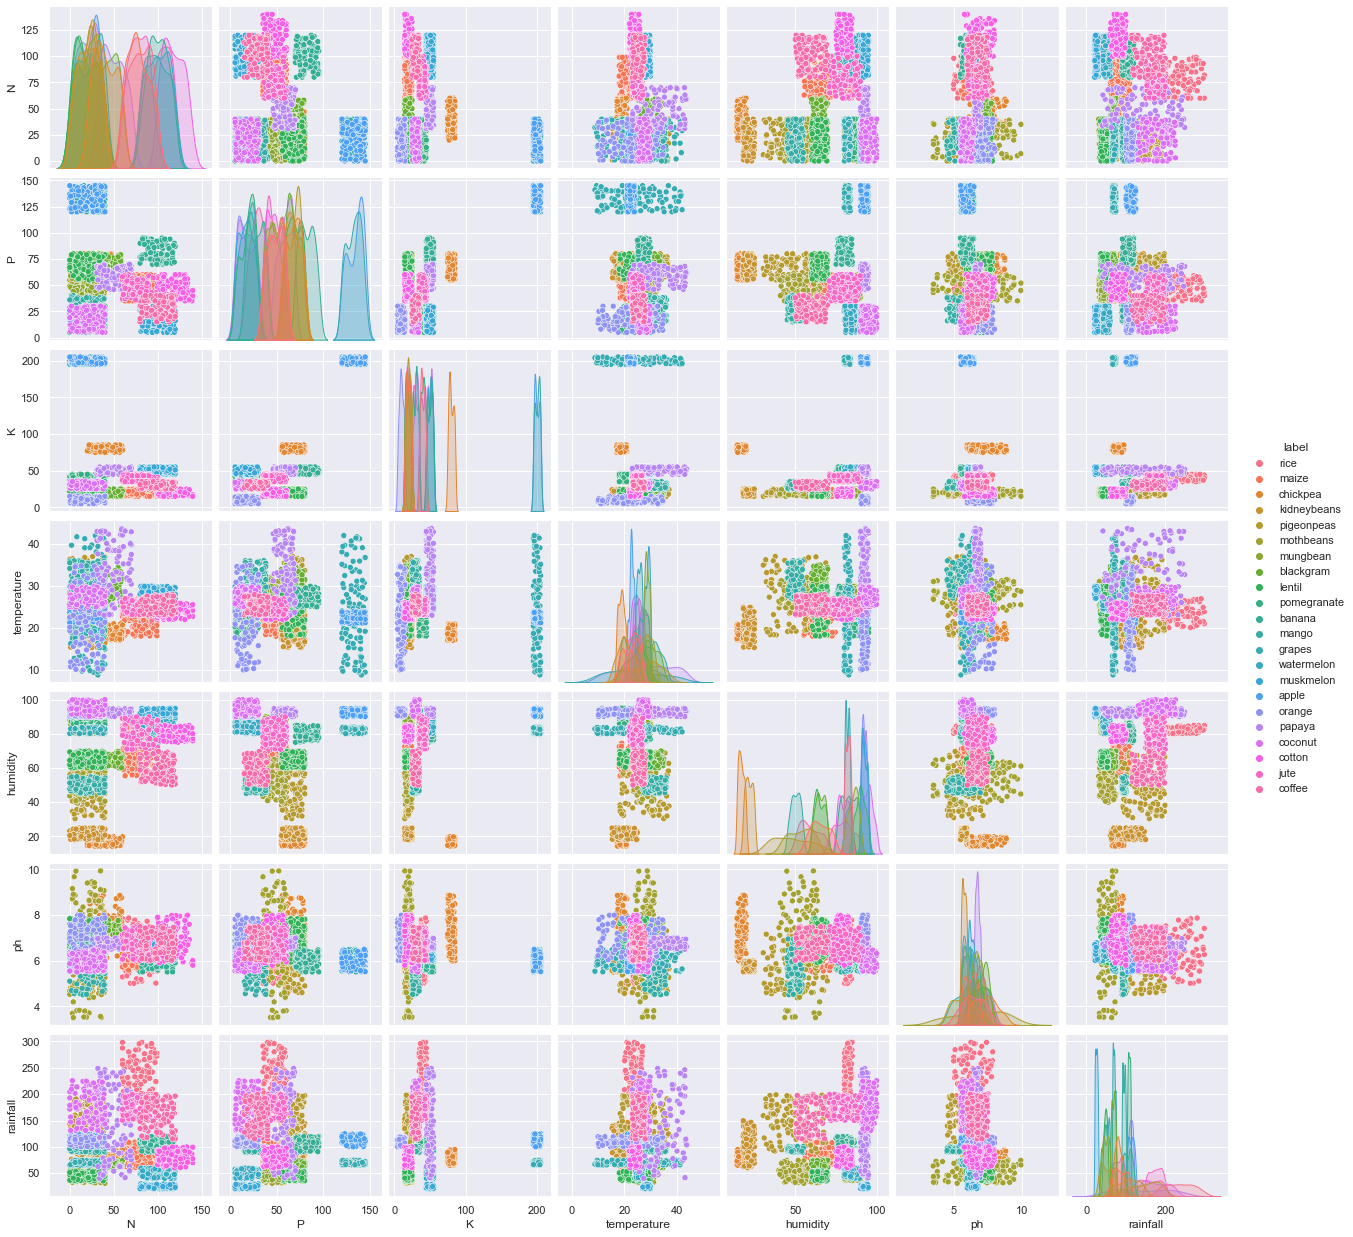

In [5]:
sns.pairplot(data,hue='label')

In [6]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

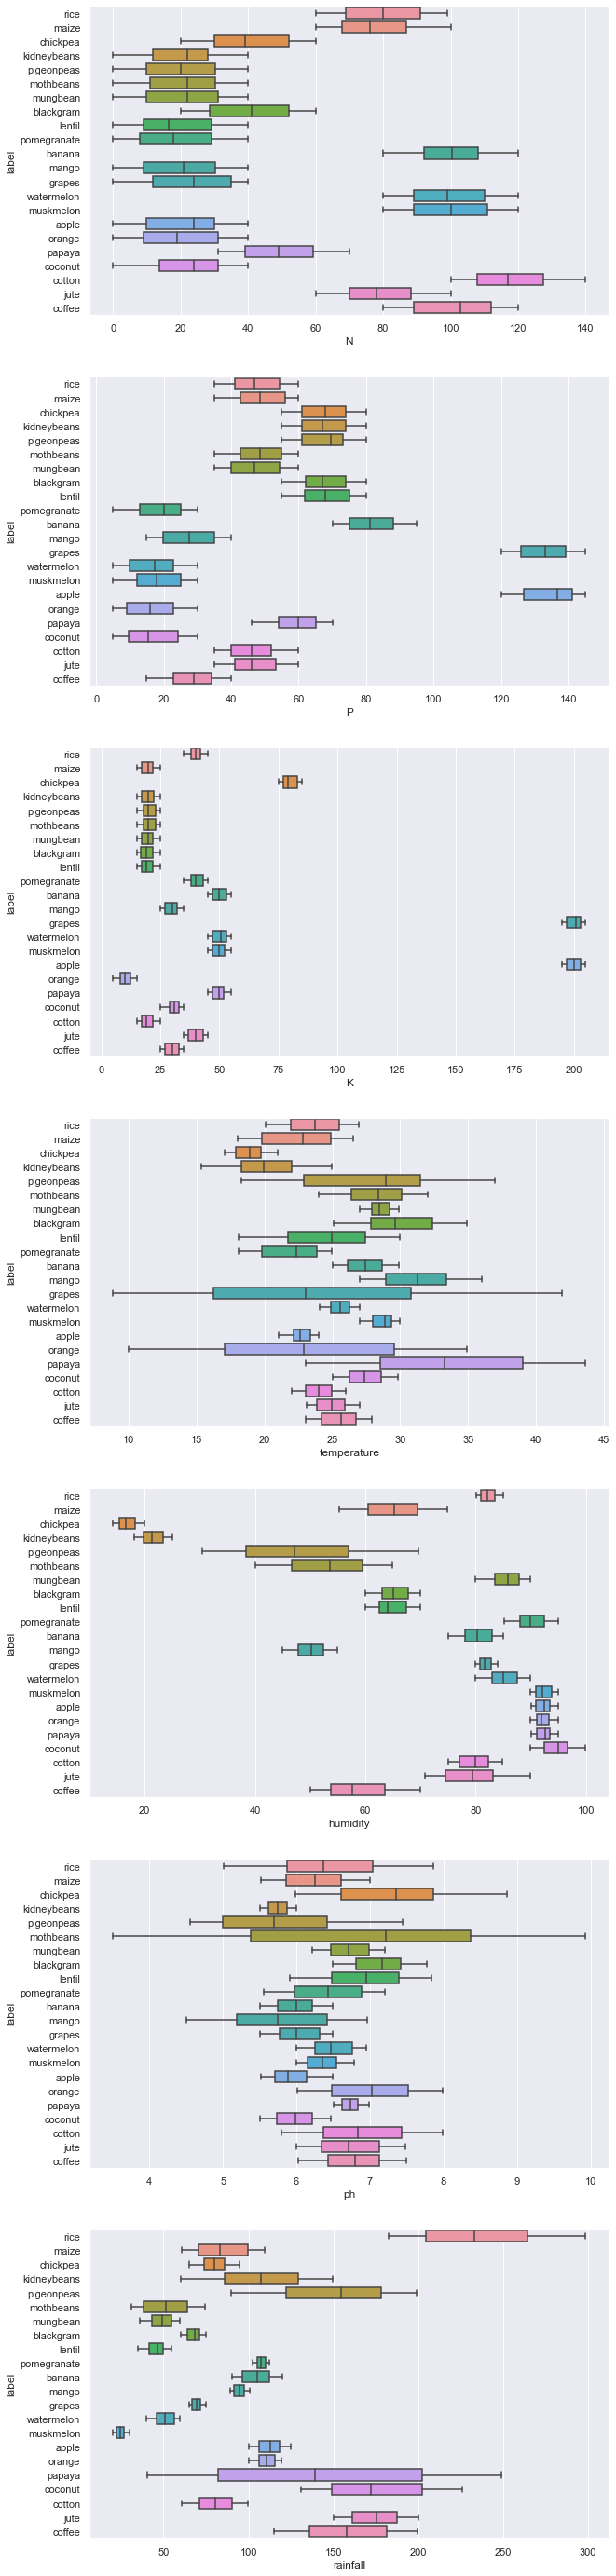

In [9]:
plt.figure(figsize=(10,50))
plt.subplot(7,1,1)
sns.boxplot(data=data,y='label',x='N')
plt.subplot(7,1,2)
sns.boxplot(data=data,y='label',x='P')
plt.subplot(7,1,3)
sns.boxplot(data=data,y='label',x='K')
plt.subplot(7,1,4)
sns.boxplot(data=data,y='label',x='temperature')
plt.subplot(7,1,5)
sns.boxplot(data=data,y='label',x='humidity')
plt.subplot(7,1,6)
sns.boxplot(data=data,y='label',x='ph')
plt.subplot(7,1,7)
sns.boxplot(data=data,y='label',x='rainfall')
plt.show()

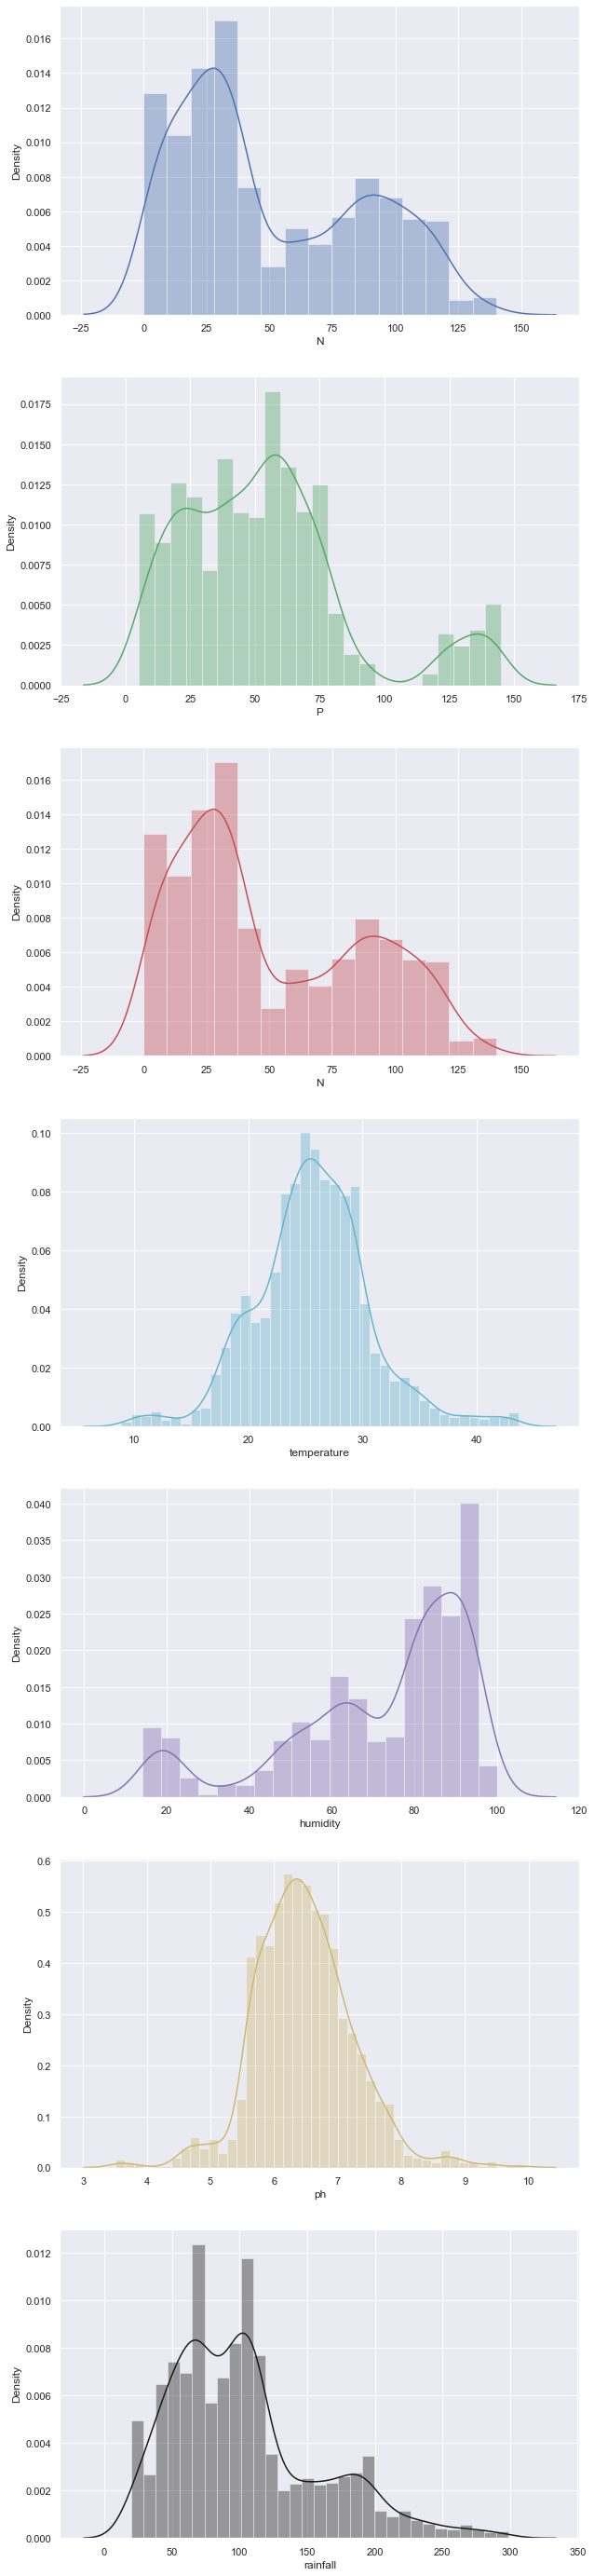

In [10]:
plt.figure(figsize=(10,50))
plt.subplot(7,1,1)
sns.distplot(data['N'],color='b')
plt.subplot(7,1,2)
sns.distplot(data['P'],color='g')
plt.subplot(7,1,3)
sns.distplot(data['N'],color='r')
plt.subplot(7,1,4)
sns.distplot(data['temperature'],color='c')
plt.subplot(7,1,5)
sns.distplot(data['humidity'],color='m')
plt.subplot(7,1,6)
sns.distplot(data['ph'],color='y')
plt.subplot(7,1,7)
sns.distplot(data['rainfall'],color='k')
plt.show()

<AxesSubplot:>

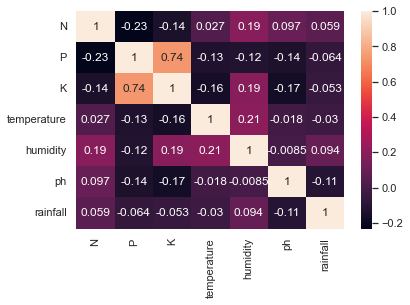

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
y=data['label']
X=data.iloc[:,:-1]


In [13]:
from pycaret.classification import *

In [14]:
cl_1= setup(data=X,target=y,session_id=2)

,Description,Value
0,Session id,2
1,Target,label
2,Target type,Multiclass
3,Target mapping,"apple: 0, banana: 1, blackgram: 2, chickpea: 3, coconut: 4, coffee: 5, cotton: 6, grapes: 7, jute: 8, kidneybeans: 9, lentil: 10, maize: 11, mango: 12, mothbeans: 13, mungbean: 14, muskmelon: 15, orange: 16, papaya: 17, pigeonpeas: 18, pomegranate: 19, rice: 20, watermelon: 21"
4,Original data shape,"(2200, 8)"
5,Transformed data shape,"(2200, 8)"
6,Transformed train set shape,"(1539, 8)"
7,Transformed test set shape,"(661, 8)"
8,Numeric features,7
9,Preprocess,True


In [15]:
clf_2= setup(data = X, target = y,pca=True,pca_components=0.95, session_id=5)

,Description,Value
0,Session id,5
1,Target,label
2,Target type,Multiclass
3,Target mapping,"apple: 0, banana: 1, blackgram: 2, chickpea: 3, coconut: 4, coffee: 5, cotton: 6, grapes: 7, jute: 8, kidneybeans: 9, lentil: 10, maize: 11, mango: 12, mothbeans: 13, mungbean: 14, muskmelon: 15, orange: 16, papaya: 17, pigeonpeas: 18, pomegranate: 19, rice: 20, watermelon: 21"
4,Original data shape,"(2200, 8)"
5,Transformed data shape,"(2200, 7)"
6,Transformed train set shape,"(1539, 7)"
7,Transformed test set shape,"(661, 7)"
8,Numeric features,7
9,Preprocess,True


In [16]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9942,0.9999,0.9942,0.9950,0.9941,0.9939,0.9939,0.0180
rf,Random Forest Classifier,0.9876,0.9998,0.9876,0.9894,0.9876,0.9871,0.9872,0.0850
et,Extra Trees Classifier,0.9864,0.9998,0.9864,0.9878,0.9863,0.9857,0.9858,0.0820
knn,K Neighbors Classifier,0.9851,0.9989,0.9851,0.9875,0.9850,0.9843,0.9845,0.0230
nb,Naive Bayes,0.9851,0.9999,0.9851,0.9872,0.9850,0.9843,0.9845,0.0220
lr,Logistic Regression,0.9805,0.9998,0.9805,0.9826,0.9804,0.9796,0.9797,1.1450
lightgbm,Light Gradient Boosting Machine,0.9746,0.9993,0.9746,0.9769,0.9745,0.9734,0.9736,0.7360
xgboost,Extreme Gradient Boosting,0.9707,0.9993,0.9707,0.9742,0.9708,0.9694,0.9695,0.3340
lda,Linear Discriminant Analysis,0.9669,0.9995,0.9669,0.9720,0.9666,0.9653,0.9656,0.0200
gbc,Gradient Boosting Classifier,0.9656,0.9986,0.9656,0.9704,0.9658,0.9639,0.9641,2.4220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [17]:
KNN= create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9805,0.9999,0.9805,0.9813,0.9805,0.9796,0.9796
1,0.9870,1.0000,0.9870,0.9899,0.9867,0.9864,0.9866
2,0.9870,0.9965,0.9870,0.9886,0.9869,0.9864,0.9865
3,0.9805,0.9965,0.9805,0.9842,0.9808,0.9796,0.9798
4,0.9870,0.9965,0.9870,0.9899,0.9873,0.9864,0.9865
5,0.9935,0.9999,0.9935,0.9943,0.9935,0.9932,0.9932
6,0.9805,0.9998,0.9805,0.9842,0.9802,0.9796,0.9798
7,0.9805,1.0000,0.9805,0.9842,0.9808,0.9796,0.9798
8,0.9805,0.9998,0.9805,0.9842,0.9802,0.9796,0.9798


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

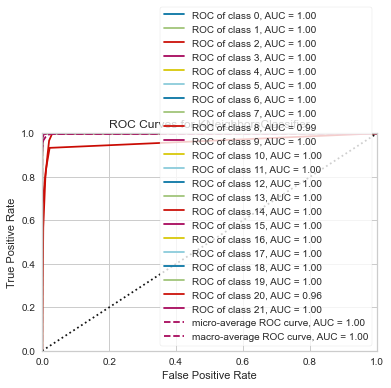

In [18]:
plot_model(KNN,plot='auc')

In [19]:

from sklearn import preprocessing
enco= preprocessing.LabelEncoder()
y=enco.fit_transform(y)
y=pd.DataFrame(y)


In [20]:
from sklearn.preprocessing import MinMaxScaler

scal= MinMaxScaler()
X_scal= scal.fit_transform(X)
X_scal= pd.DataFrame(X_scal)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scal,y,random_state=8,train_size=0.80)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
knn.score(X_test,y_test)

0.9840909090909091

<AxesSubplot:>

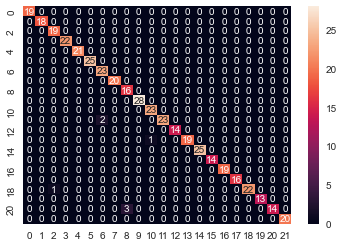

In [24]:
from sklearn.metrics import confusion_matrix
m= confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(m,annot=True)

In [25]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9414772727272728

In [26]:
from sklearn.svm import SVC
model= SVC()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9857954545454546

In [27]:
ccc=enco.inverse_transform([2])
ccc[0]

'blackgram'